<a href="https://colab.research.google.com/github/mietekdom/Data-Science/blob/master/01_knowledge/05_Obliczanie_kolumn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')

Pandas: 1.0.5
Numpy: 1.18.5


Zaczytywanie danych - firma Uber

In [47]:
def fetch_financial_data(company='UBER'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 329 entries, 2020-08-27 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    329 non-null    float64
 1   High    329 non-null    float64
 2   Low     329 non-null    float64
 3   Close   329 non-null    float64
 4   Volume  329 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.4 KB


In [48]:
df.iloc[0:4, :]

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,32.40,33.07,32.27,32.80,21306491
2020-08-26,31.01,32.71,30.95,32.30,20599776
2020-08-25,31.04,31.19,30.60,31.19,10056762
2020-08-24,30.97,31.30,30.37,31.04,17406239


In [49]:
df.describe() # ogólna statystyka do danych

,Open,High,Low,Close,Volume
count,329.000000,329.000000,329.000000,329.00000,3.290000e+02
mean,33.772944,34.451718,32.961282,33.72924,2.506019e+07
std,5.743001,5.677277,5.758421,5.68188,2.037883e+07
min,15.960000,17.800000,13.710000,14.82000,3.380003e+06
25%,30.000000,30.420000,29.360000,30.05000,1.033152e+07
50%,32.710000,33.300000,31.900000,32.68000,2.097652e+07
75%,37.500000,37.900000,36.530000,37.04000,3.291258e+07
max,46.980000,47.080000,45.080000,46.38000,1.863225e+08


In [50]:
df['Average'] = (df.Open + df.Close) / 2 #dodajemy nową kolumnę (średnia z Open i Close)
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-08-27,32.40,33.07,32.2700,32.80,21306491,32.600
2020-08-26,31.01,32.71,30.9500,32.30,20599776,31.655
2020-08-25,31.04,31.19,30.6000,31.19,10056762,31.115
2020-08-24,30.97,31.30,30.3700,31.04,17406239,31.005
2020-08-21,31.39,31.82,30.7144,30.83,20216997,31.110


In [51]:
df = df.sort_index() # sortowanie wartości
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [52]:
df['Daily_Change'] = df[['Close']].shift(1) #przesuwamy wiersze o jeden
df.head()

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [55]:
df['Close_Shift'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,41.29


In [56]:
df['Daily_Change'] = df.Close / df.Close_Shift -1 #dzienna zmiana procentowa
df.head()

,Open,High,Low,Close,Volume,Average,Daily_Change,Close_Shift
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,-0.107529,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,0.077089,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,0.033283,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,0.041414,41.29


In [57]:
df.Daily_Change.min() # najwiekszy dzienny spadek

-0.21628767847699626

In [58]:
df.Daily_Change.max() # najwiekszy dzienny wzrost

0.3825910931174088

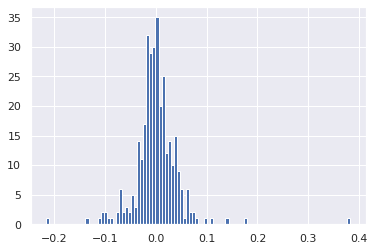

In [38]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

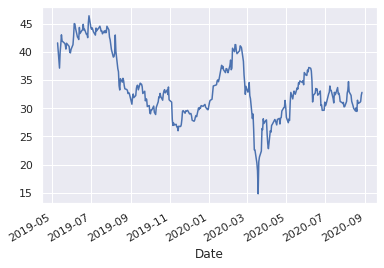

In [39]:
df.Close.plot()